In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('nomad.csv')
pd.set_option('display.max_rows', None)

In [3]:
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                          17030
Address type                                                                          0
Ownership                       

In [4]:
df = df.dropna(subset=['Perc_of_house_with_6plus_room','Women_15_19_Mothers_or_Pregnant_at_time_of_survey','perc_of_pop_living_in_hh_electricity','perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms','mat_roof_Metal_GI_Asbestos_sheets','perc_of_Wall_material_with_Burnt_brick','Households_with_improved_Sanitation_Facility','perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k','Total_Land_For_Agriculture'])

In [5]:
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                          16900
Address type                                                                          0
Ownership                       

In [6]:
mask = (df['No_of_Active_Loan_In_Bureau'] == 0) & (df['Avg_Disbursement_Amount_Bureau'].isna())
df.loc[mask, 'Avg_Disbursement_Amount_Bureau'] = 0
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                          16900
Address type                                                                          0
Ownership                       

In [7]:
Q1 = df['Target_Variable/Total Income'].quantile(0.25)
Q3 = df['Target_Variable/Total Income'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_nomad_cleaned = df[(df['Target_Variable/Total Income'] >= lower_bound) &
              (df['Target_Variable/Total Income'] <= upper_bound)]
df_nomad_cleaned.head(5)

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1002818465057450,MADHYA PRADESH,CENTRAL,M,BARELI,464668,RAISEN,Seoni,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,97.24,19.50,0.95,22.38,33.53,Poor,0.77,0.00,1360000
1,1012300674433870,BIHAR,EAST,M,BANDRA,848125,MUZAFFARPUR,Namapur,M,NaN,...,DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,73.96,16.76,0.97,24.63,37.17,Poor,0.45,0.00,807200
2,1013472263587380,MADHYA PRADESH,CENTRAL,M,MALHARGARH,458556,MANDSAUR,Billaud,M,NaN,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,90.05,22.44,0.95,19.49,28.85,Poor,0.66,0.00,500000
3,1019525480704050,MAHARASHTRA,WEST,M,RENAPUR,413527,LATUR,Renapur,M,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.64,21.48,0.98,31.84,48.85,Average,0.24,2.49,558000
4,1021915867444260,MADHYA PRADESH,CENTRAL,F,KHURAI,470117,SAGAR,Singhpur,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,95.90,18.93,0.97,21.33,31.82,Poor,0.21,0.00,800000


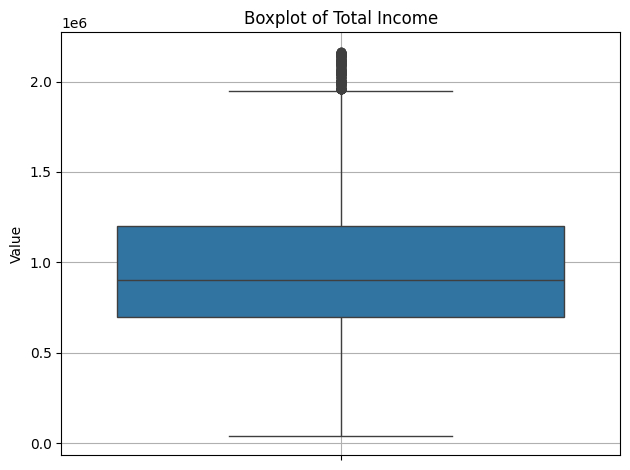

In [8]:
import seaborn as sns
sns.boxplot(y=df_nomad_cleaned['Target_Variable/Total Income'])
plt.title("Boxplot of Total Income")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
Q1 = df_nomad_cleaned['Target_Variable/Total Income'].quantile(0.25)
Q3 = df_nomad_cleaned['Target_Variable/Total Income'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_nomad_final_cleaned = df_nomad_cleaned[(df_nomad_cleaned['Target_Variable/Total Income'] >= lower_bound) &
              (df_nomad_cleaned['Target_Variable/Total Income'] <= upper_bound)]
df_nomad_final_cleaned.head(5)

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1002818465057450,MADHYA PRADESH,CENTRAL,M,BARELI,464668,RAISEN,Seoni,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,97.24,19.50,0.95,22.38,33.53,Poor,0.77,0.00,1360000
1,1012300674433870,BIHAR,EAST,M,BANDRA,848125,MUZAFFARPUR,Namapur,M,NaN,...,DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,73.96,16.76,0.97,24.63,37.17,Poor,0.45,0.00,807200
2,1013472263587380,MADHYA PRADESH,CENTRAL,M,MALHARGARH,458556,MANDSAUR,Billaud,M,NaN,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,90.05,22.44,0.95,19.49,28.85,Poor,0.66,0.00,500000
3,1019525480704050,MAHARASHTRA,WEST,M,RENAPUR,413527,LATUR,Renapur,M,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.64,21.48,0.98,31.84,48.85,Average,0.24,2.49,558000
4,1021915867444260,MADHYA PRADESH,CENTRAL,F,KHURAI,470117,SAGAR,Singhpur,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,95.90,18.93,0.97,21.33,31.82,Poor,0.21,0.00,800000


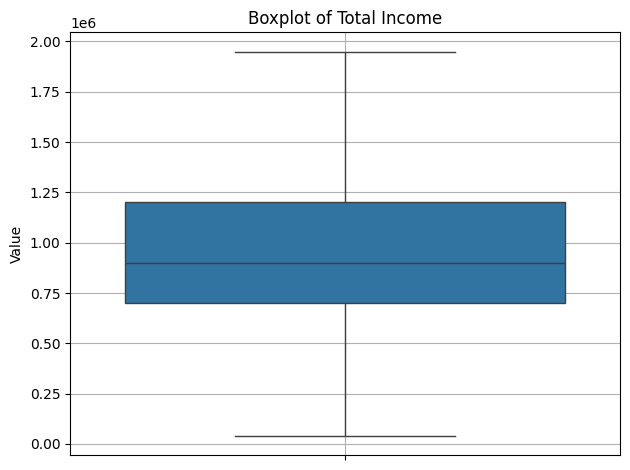

In [11]:
import seaborn as sns
sns.boxplot(y=df_nomad_final_cleaned['Target_Variable/Total Income'])
plt.title("Boxplot of Total Income")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                          16900
Address type                                                                          0
Ownership                       

In [14]:
df['Location'] = df['Location'].fillna('None')
df['Ownership'] = df['Ownership'].fillna('None')

In [15]:
df.isnull().sum()

FarmerID                                                                          0
State                                                                             0
REGION                                                                            0
SEX                                                                               0
CITY                                                                              0
Zipcode                                                                           0
DISTRICT                                                                          0
VILLAGE                                                                           0
MARITAL_STATUS                                                                    0
Location                                                                          0
Address type                                                                      0
Ownership                                                                   